In [1]:
!nvidia-smi

Mon Jun 16 00:50:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
!apt update
!apt install -y nvidia-cuda-toolkit

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
35 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InR

In [8]:
%%writefile hello.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_from_gpu() {
    int tid = threadIdx.x + blockDim.x * blockIdx.x;
    if (tid == 0)  // Print only once to avoid clutter
        printf("Hello from GPU!\\n");
}

int main() {
    hello_from_gpu<<<4, 32>>>();  // 128 threads total

    cudaError_t err = cudaGetLastError();
    if (err != cudaSuccess) {
        printf("CUDA Error: %s\\n", cudaGetErrorString(err));
        return -1;
    }

    cudaDeviceSynchronize();
    return 0;
}

Overwriting hello.cu


In [9]:
!nvcc hello.cu -o hello
!./hello

CUDA Error: the provided PTX was compiled with an unsupported toolchain.\n

In [10]:
!apt remove --purge -y nvidia-cuda-toolkit


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following packages were automatically installed and are no longer required:
  fonts-dejavu-extra libaccinj64-11.5 libatk-wrapper-java
  libatk-wrapper-java-jni libbabeltrace1 libcub-dev libcublas11 libcublaslt11
  libcudart11.0 libcufft10 libcufftw10 libcuinj64-11.5 libcupti-dev
  libcupti-doc libcupti11.5 libcurand10 libcusolver11 libcusolvermg11
  libcusparse11 libdebuginfod-common libdebuginfod1 libgail-common libgail18
  libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libipt2 libnppc11 libnppial11
  libnppicc11 libnppidei11 libnppif11 libnppig11 libnppim11 libnppist11
  libnppisu11 libnppitc11 libnpps11 libnvblas11 libnvidia-compute-495
  libnvidia-compute-510 libnvidia-ml-dev libnvjpeg11 libnvrtc-builtins11.5
  libnvrtc11.2 libnvtoolsext1 libnvvm4 libsource-highlight-common
  libsource-highlight4v5 libthrust-dev libvdpau-dev node-html5shiv
  nvidia-cuda-dev nvidia-cuda-gdb nvidia-cuda-t

In [11]:
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
!apt-key adv --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
!apt update
!apt install -y cuda-toolkit-11-8


--2025-06-16 00:53:41--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/cuda-repo-ubuntu2004_11.8.0-1_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 23.43.51.15, 23.43.51.10
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|23.43.51.15|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-16 00:53:41 ERROR 404: Not Found.

dpkg: error: cannot access archive 'cuda-repo-ubuntu2004_11.8.0-1_amd64.deb': No such file or directory
Executing: /tmp/apt-key-gpghome.SsqN0K0cLB/gpg.1.sh --fetch-keys https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub
gpg: requesting key from 'https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/3bf863cc.pub'
gpg: key A4B469963BF863CC: public key "cudatools <cudatools@nvidia.com>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Hit:1 https://developer.download.nvidia.

In [12]:
import os
os.environ['PATH'] = '/usr/local/cuda-11.8/bin:' + os.environ['PATH']

In [13]:
%%writefile hello.cu
#include <stdio.h>
#include <cuda_runtime.h>

__global__ void hello_from_gpu() {
    int tid = threadIdx.x + blockDim.x * blockIdx.x;
    if (tid == 0)
        printf("Hello from GPU!\\n");
}

int main() {
    hello_from_gpu<<<4, 32>>>();  // 128 threads

    cudaError_t err = cudaGetLastError();
    if (err != cudaSuccess) {
        printf("CUDA Error: %s\\n", cudaGetErrorString(err));
        return -1;
    }

    cudaDeviceSynchronize();
    return 0;
}

Overwriting hello.cu


In [14]:
!nvcc hello.cu -o hello
!./hello

Hello from GPU!\n

## Modified CUDA code

In [16]:
%%writefile saxpy_timing.cu
#include <stdio.h>
#include <cuda_runtime.h>
#include <math.h>

__global__
void saxpy(int n, float a, float *x, float *y) {
    int i = blockIdx.x * blockDim.x + threadIdx.x;
    if (i < n)
        y[i] = a * x[i] + y[i];
}

int main() {
    for (int p = 15; p <= 25; ++p) {
        int N = 1 << p;
        size_t size = N * sizeof(float);

        float *x = (float*)malloc(size);
        float *y = (float*)malloc(size);
        float *d_x, *d_y;

        for (int i = 0; i < N; i++) {
            x[i] = 1.0f;
            y[i] = 2.0f;
        }

        cudaEvent_t start_total, stop_total;
        cudaEvent_t start_kernel, stop_kernel;
        cudaEventCreate(&start_total);
        cudaEventCreate(&stop_total);
        cudaEventCreate(&start_kernel);
        cudaEventCreate(&stop_kernel);

        cudaEventRecord(start_total);

        cudaMalloc(&d_x, size);
        cudaMalloc(&d_y, size);
        cudaMemcpy(d_x, x, size, cudaMemcpyHostToDevice);
        cudaMemcpy(d_y, y, size, cudaMemcpyHostToDevice);

        cudaEventRecord(start_kernel);
        saxpy<<<(N + 255) / 256, 256>>>(N, 2.0f, d_x, d_y);
        cudaEventRecord(stop_kernel);

        cudaMemcpy(y, d_y, size, cudaMemcpyDeviceToHost);

        cudaEventRecord(stop_total);
        cudaEventSynchronize(stop_total);
        cudaEventSynchronize(stop_kernel);

        float ms_total = 0.0f, ms_kernel = 0.0f;
        cudaEventElapsedTime(&ms_total, start_total, stop_total);
        cudaEventElapsedTime(&ms_kernel, start_kernel, stop_kernel);

        float maxError = 0.0f;
        for (int i = 0; i < N; i++)
            maxError = fmaxf(maxError, fabsf(y[i] - 4.0f));

        printf("N = 2^%d\tTotal time = %.3f ms\tKernel time = %.3f ms\tMax error = %f\n",
               p, ms_total, ms_kernel, maxError);

        cudaFree(d_x);
        cudaFree(d_y);
        free(x);
        free(y);
        cudaEventDestroy(start_total);
        cudaEventDestroy(stop_total);
        cudaEventDestroy(start_kernel);
        cudaEventDestroy(stop_kernel);
    }

    return 0;
}

Writing saxpy_timing.cu


In [17]:
!nvcc saxpy_timing.cu -o saxpy_timing
!./saxpy_timing

N = 2^15	Total time = 12.041 ms	Kernel time = 11.667 ms	Max error = 0.000000
N = 2^16	Total time = 0.439 ms	Kernel time = 0.013 ms	Max error = 0.000000
N = 2^17	Total time = 0.679 ms	Kernel time = 0.016 ms	Max error = 0.000000
N = 2^18	Total time = 1.123 ms	Kernel time = 0.018 ms	Max error = 0.000000
N = 2^19	Total time = 1.748 ms	Kernel time = 0.027 ms	Max error = 0.000000
N = 2^20	Total time = 3.298 ms	Kernel time = 0.052 ms	Max error = 0.000000
N = 2^21	Total time = 5.563 ms	Kernel time = 0.101 ms	Max error = 0.000000
N = 2^22	Total time = 11.246 ms	Kernel time = 0.192 ms	Max error = 0.000000
N = 2^23	Total time = 23.497 ms	Kernel time = 0.380 ms	Max error = 0.000000
N = 2^24	Total time = 45.153 ms	Kernel time = 0.765 ms	Max error = 0.000000
N = 2^25	Total time = 92.901 ms	Kernel time = 1.523 ms	Max error = 0.000000


# Visualization

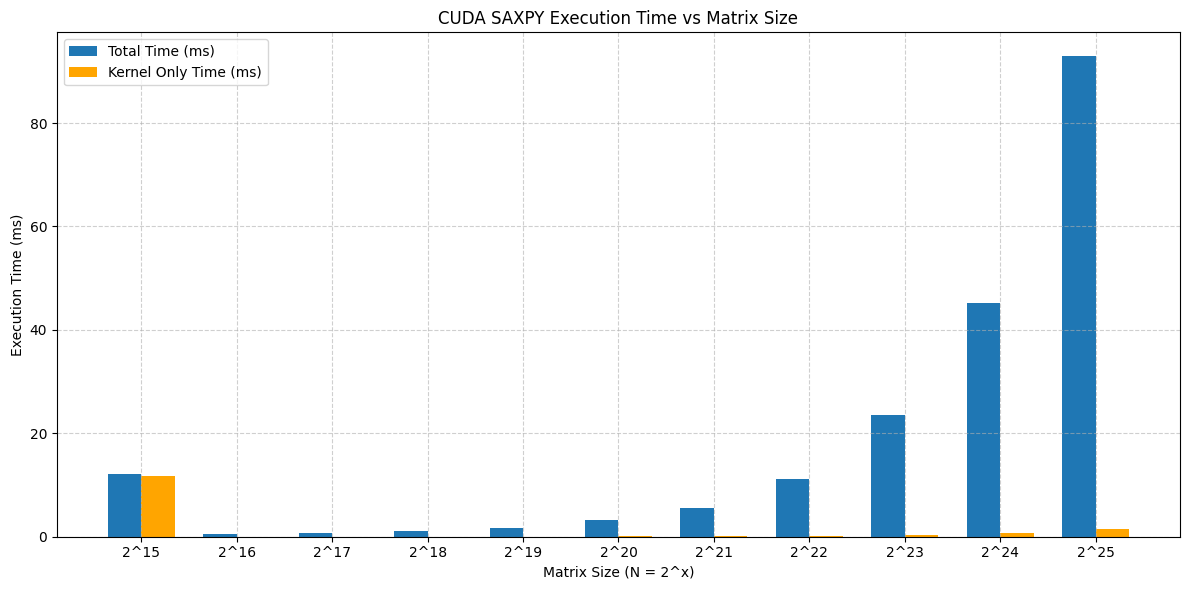

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Replace these with your actual measured times from Colab output
powers = np.array([15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
total_times = np.array([12.041, 0.439, 0.679, 1.123, 1.748, 3.298, 5.563, 11.246, 23.497, 45.153, 92.901])
kernel_times = np.array([11.667, 0.013, 0.016, 0.018, 0.027, 0.052, 0.101, 0.192, 0.380, 0.765, 1.523])

# Create x-axis positions and labels
x = np.arange(len(powers))
labels = [f"2^{p}" for p in powers]

# Plot
plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(x - bar_width/2, total_times, bar_width, label="Total Time (ms)")
plt.bar(x + bar_width/2, kernel_times, bar_width, label="Kernel Only Time (ms)", color='orange')

plt.xlabel("Matrix Size (N = 2^x)")
plt.ylabel("Execution Time (ms)")
plt.title("CUDA SAXPY Execution Time vs Matrix Size")
plt.xticks(x, labels)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
